# Compare vaccination strategies per ERVA and age groups. $e$=0.7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS
from matplotlib.lines import Line2D

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [19]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
taus = EXPERIMENTS['taus']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']
e = EPIDEMIC['e']
strategies = EXPERIMENTS['strategies']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']
color_palette = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
len_bar = 5
sep_bet_group = 4*len_bar
legend_width = 4

begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
ts = [begin + datetime.timedelta(days=day) for day in range(T)]
print('Simulation ends: %s' % (ts[-1]))
t2 = int(T-1)
t1 = t2-30

Simulation ends: 2021-08-10 00:00:00


In [4]:
exp_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=init_vacc,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e,
                                      taus=taus)

Beginning experiments.
Parameters:
Number of age ervas: 5.
Number of age groups: 9.
Number of vaccines per day: 30000.
t0: 2021-04-18.
T: 115.
Vaccine efficacy (e): 0.7.
Rs to try: [0.75, 1.0, 1.25, 1.5].
Taus to try: [0, 0.5, 1.0].
Initialize with vaccinated people: True.
Strategies:
[([1, 0, 0], 'Pop only'), ([0, 0, 0], 'No vaccination'), ([0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop, Inf and Hosp'), ([0.5, 0, 0.5], 'Pop and Hosp'), ([0.5, 0.5, 0], 'Pop and Inf'), ([0, 0.5, 0.5], 'Hosp and Inf'), ([0, 0, 1], 'Hosp only'), ([0, 1, 0], 'Inf only'), (None, 'Optimal')].

Running 108 experiments with 4 CPUS.
Start (51032). Exp: 2. R: 0.75. tau: 0. Policy: No vaccinationStart (51031). Exp: 1. R: 0.75. tau: 0. Policy: Pop onlyStart (51033). Exp: 3. R: 0.75. tau: 0. Policy: Pop, Inf and HospStart (51034). Exp: 4. R: 0.75. tau: 0. Policy: Pop and Hosp



Finished (51031). Exp: 1. Elapsed: 0:00:03.201360
Start (51031). Exp: 5. R: 0.75. tau: 0. Policy: Pop and Inf
Finished

Start (51032). Exp: 60. R: 1.25. tau: 0.5. Policy: Hosp and Inf
Finished (51031). Exp: 57. Elapsed: 0:00:03.199522
Start (51031). Exp: 61. R: 1.25. tau: 0.5. Policy: Hosp only
Finished (51033). Exp: 58. Elapsed: 0:00:03.211118
Start (51033). Exp: 62. R: 1.25. tau: 0.5. Policy: Inf only
Finished (51034). Exp: 59. Elapsed: 0:00:03.307324
Start (51034). Exp: 63. R: 1.25. tau: 0.5. Policy: Optimal
Finished (51032). Exp: 60. Elapsed: 0:00:03.301034
Start (51032). Exp: 91. R: 1.25. tau: 1.0. Policy: Pop only
Finished (51031). Exp: 61. Elapsed: 0:00:03.277532
Start (51031). Exp: 92. R: 1.25. tau: 1.0. Policy: No vaccination
Finished (51033). Exp: 62. Elapsed: 0:00:03.218370
Start (51033). Exp: 93. R: 1.25. tau: 1.0. Policy: Pop, Inf and Hosp
Finished (51034). Exp: 63. Elapsed: 0:00:03.197685
Start (51034). Exp: 94. R: 1.25. tau: 1.0. Policy: Pop and Hosp
Finished (51032). Exp: 91. Elapsed: 0:00:03.317190
Start (51032). Exp: 95. R: 1.25. tau: 1.0. Policy: Pop and InfFinished (51031). Exp: 92. 

In [10]:
def plot_bars_ages_ervas(ax, r, tau, metric, exp_results, labels, plot, t2=t2, t1=t1,
                         baseline='Pop only', skip_no_vacc=True):
    results = exp_results[r][tau]
    
    total_strategies = len(results.keys())
    skip_num = 1
    if skip_no_vacc:
        skip_num += 1
    space_label = len_bar*(total_strategies-skip_num) + sep_bet_group
    
    baseline_cumm = None
    for label, label_level in results.items():
        if label == baseline:
            baseline_results = label_level['results'][metric]
            baseline_cumm = baseline_results.cumsum(axis=2)

            if plot == 'ERVA':
                baseline_cumm = baseline_cumm.sum(axis=0)
            elif plot == 'Age group':
                baseline_cumm = baseline_cumm.sum(axis=1)
            else:
                raise ValueError('Not valid value to plot')
    
    assert baseline_cumm is not None
    
    total_plot_space = space_label*len(labels) + sep_bet_group
    ax.set_xlim(0, total_plot_space)
    
    num_strategy = 0
    legend_elements = []
    for label, label_level in results.items():
        if label == baseline:
            continue
        
        if label == 'No vaccination' and skip_no_vacc:
            continue

        policy_results = label_level['results'][metric]
        policy_cumm = policy_results.cumsum(axis=2)

        if plot == 'ERVA':
            policy_cumm = policy_cumm.sum(axis=0)
        elif plot == 'Age group':
            policy_cumm = policy_cumm.sum(axis=1)
        else:
            raise ValueError('Not valid value to plot')

                
        assert policy_cumm.shape == baseline_cumm.shape
        assert policy_cumm.shape[0] == len(labels)

        relative_to_baseline = policy_cumm/baseline_cumm
        relative_to_baseline = np.nan_to_num(relative_to_baseline, nan=1)
        relative_to_baseline = relative_to_baseline - 1
        relative_to_baseline = relative_to_baseline*100

        min_reduction = relative_to_baseline[:, t1]
        max_reduction = relative_to_baseline[:, t2]


        color_i = num_strategy % len(color_palette)
        color = color_palette[color_i]
        for label_i in range(len(labels)):
            x1_square = label_i*space_label + sep_bet_group + num_strategy*len_bar
            y1_square = min_reduction[label_i]
            y2_square = max_reduction[label_i] - min_reduction[label_i]

            
            ax.broken_barh([(x1_square, len_bar), ], (y1_square, y2_square),
                           color=color)

        legend_elements.append(Line2D([0], [0], color=color, lw=legend_width, label=label))

        num_strategy += 1
    
    space_bars = space_label - sep_bet_group
    middle_of_space = space_bars/2
    pos_tick =  sep_bet_group + middle_of_space
    ticks = []
    for label_i in range(len(labels)):
        abs_pos_tick = label_i*space_label + pos_tick
        ticks.append(abs_pos_tick)
        
    assert len(ticks) == len(labels)
    assert len(legend_elements) == total_strategies-skip_num
    
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
#     ax.set_yticks(np.arange(0, 105, 5))
    ax.set_xlabel(plot)
    ax.set_ylabel('Reduction in percentage')
    ax.set_title('Reduction in %s at %ss per policy . R=%s' % (metric, plot, r))
    ax.legend(handles=legend_elements, loc='upper left', framealpha=0.5)
    

    return ax

# Deaths

/Users/aponcedeleonch/Documents/Aalto/Courses/MasterThesis/Code/norway-commuter_model-spread/env/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


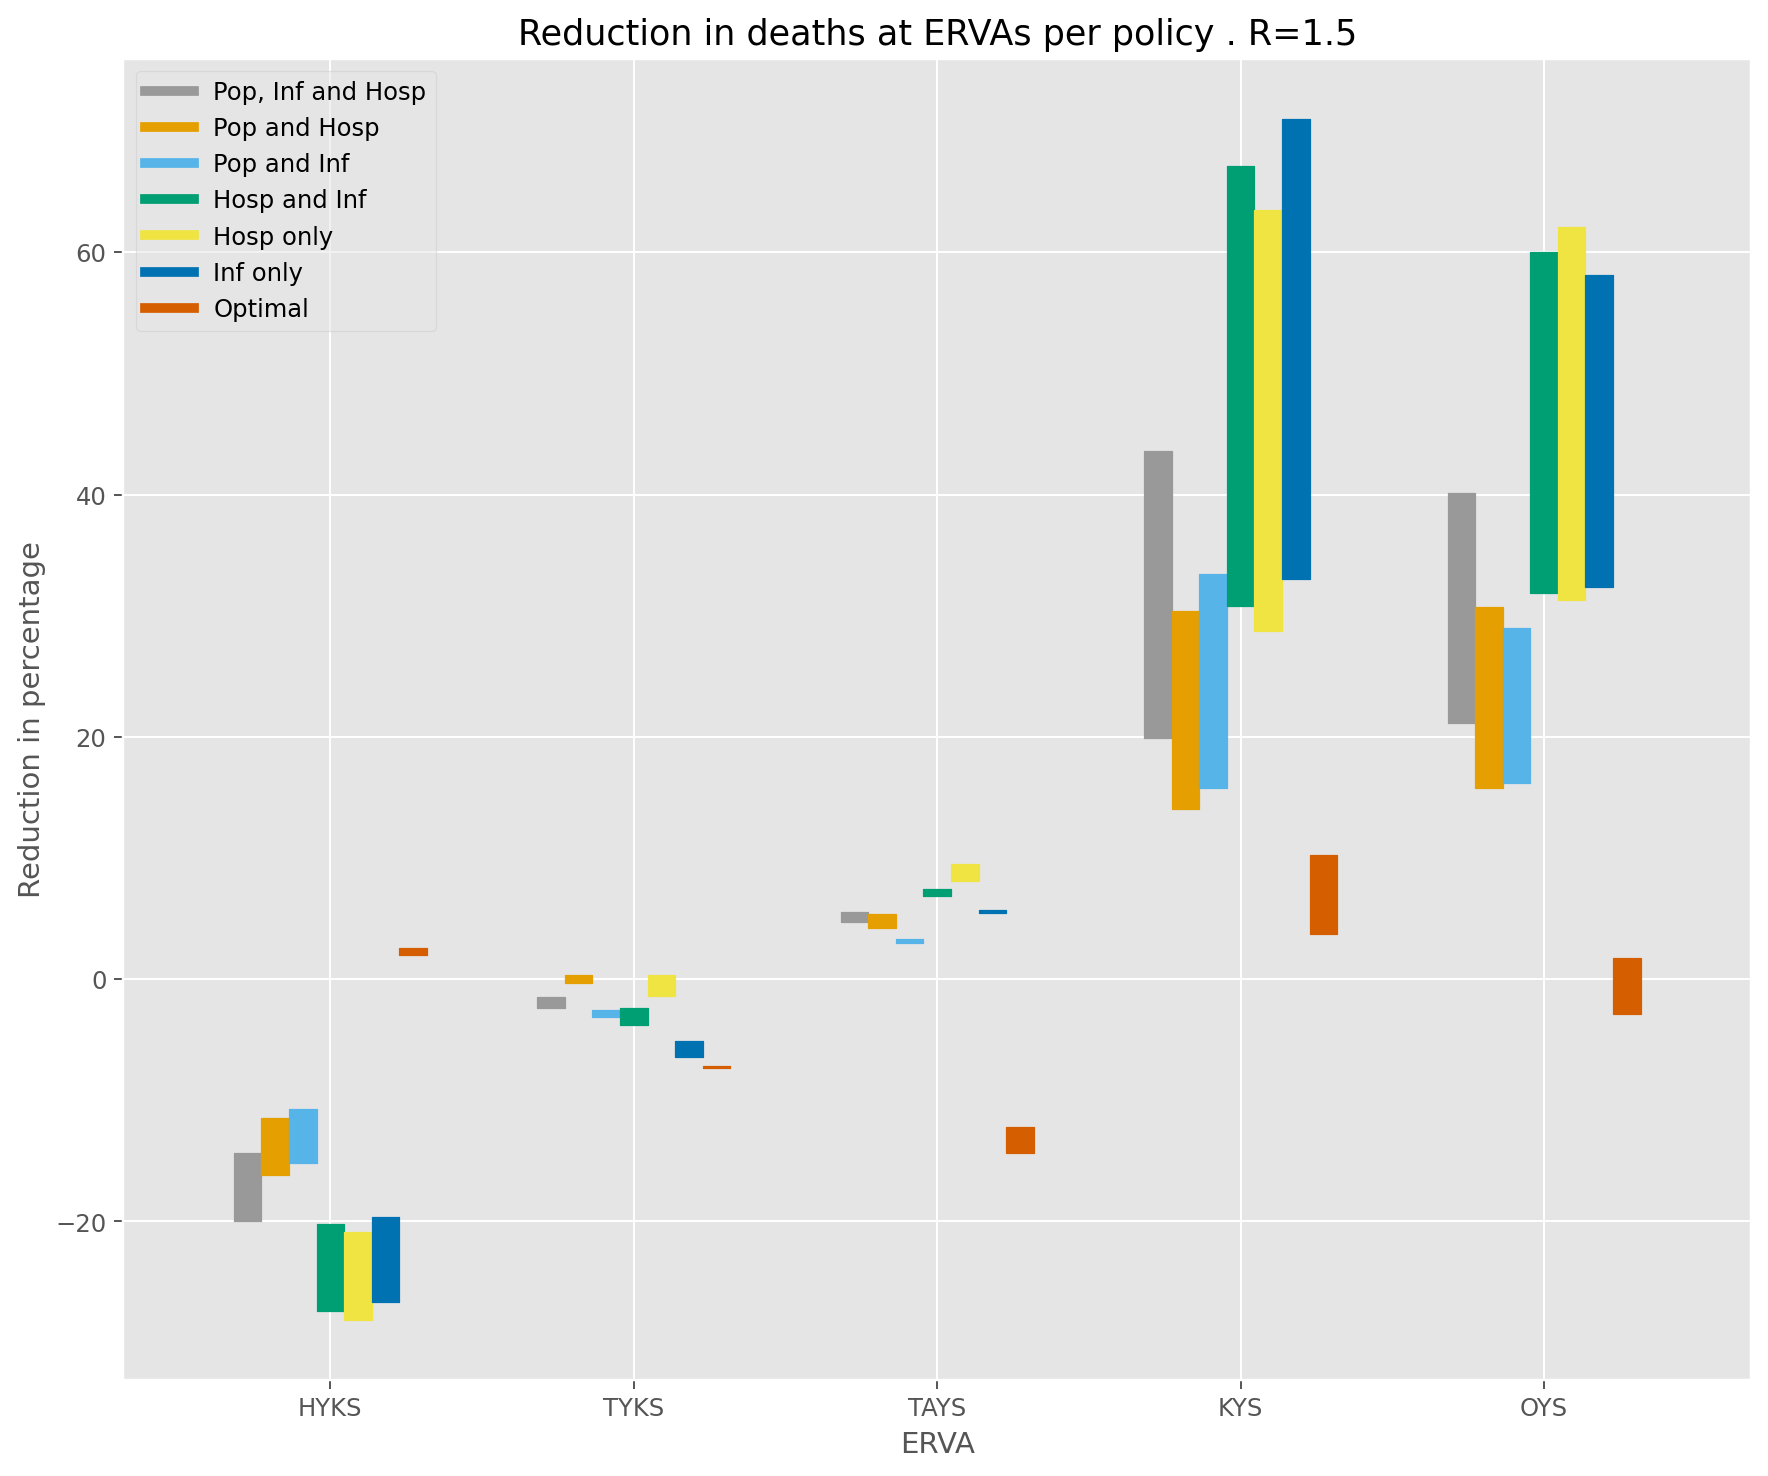

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_bars_ages_ervas(ax, r=1.5, tau=0.5, metric='deaths', exp_results=exp_results, labels=ervas_labels,
                          plot='ERVA', t2=t2, t1=t1, baseline='Pop only', skip_no_vacc=True)

/Users/aponcedeleonch/Documents/Aalto/Courses/MasterThesis/Code/norway-commuter_model-spread/env/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


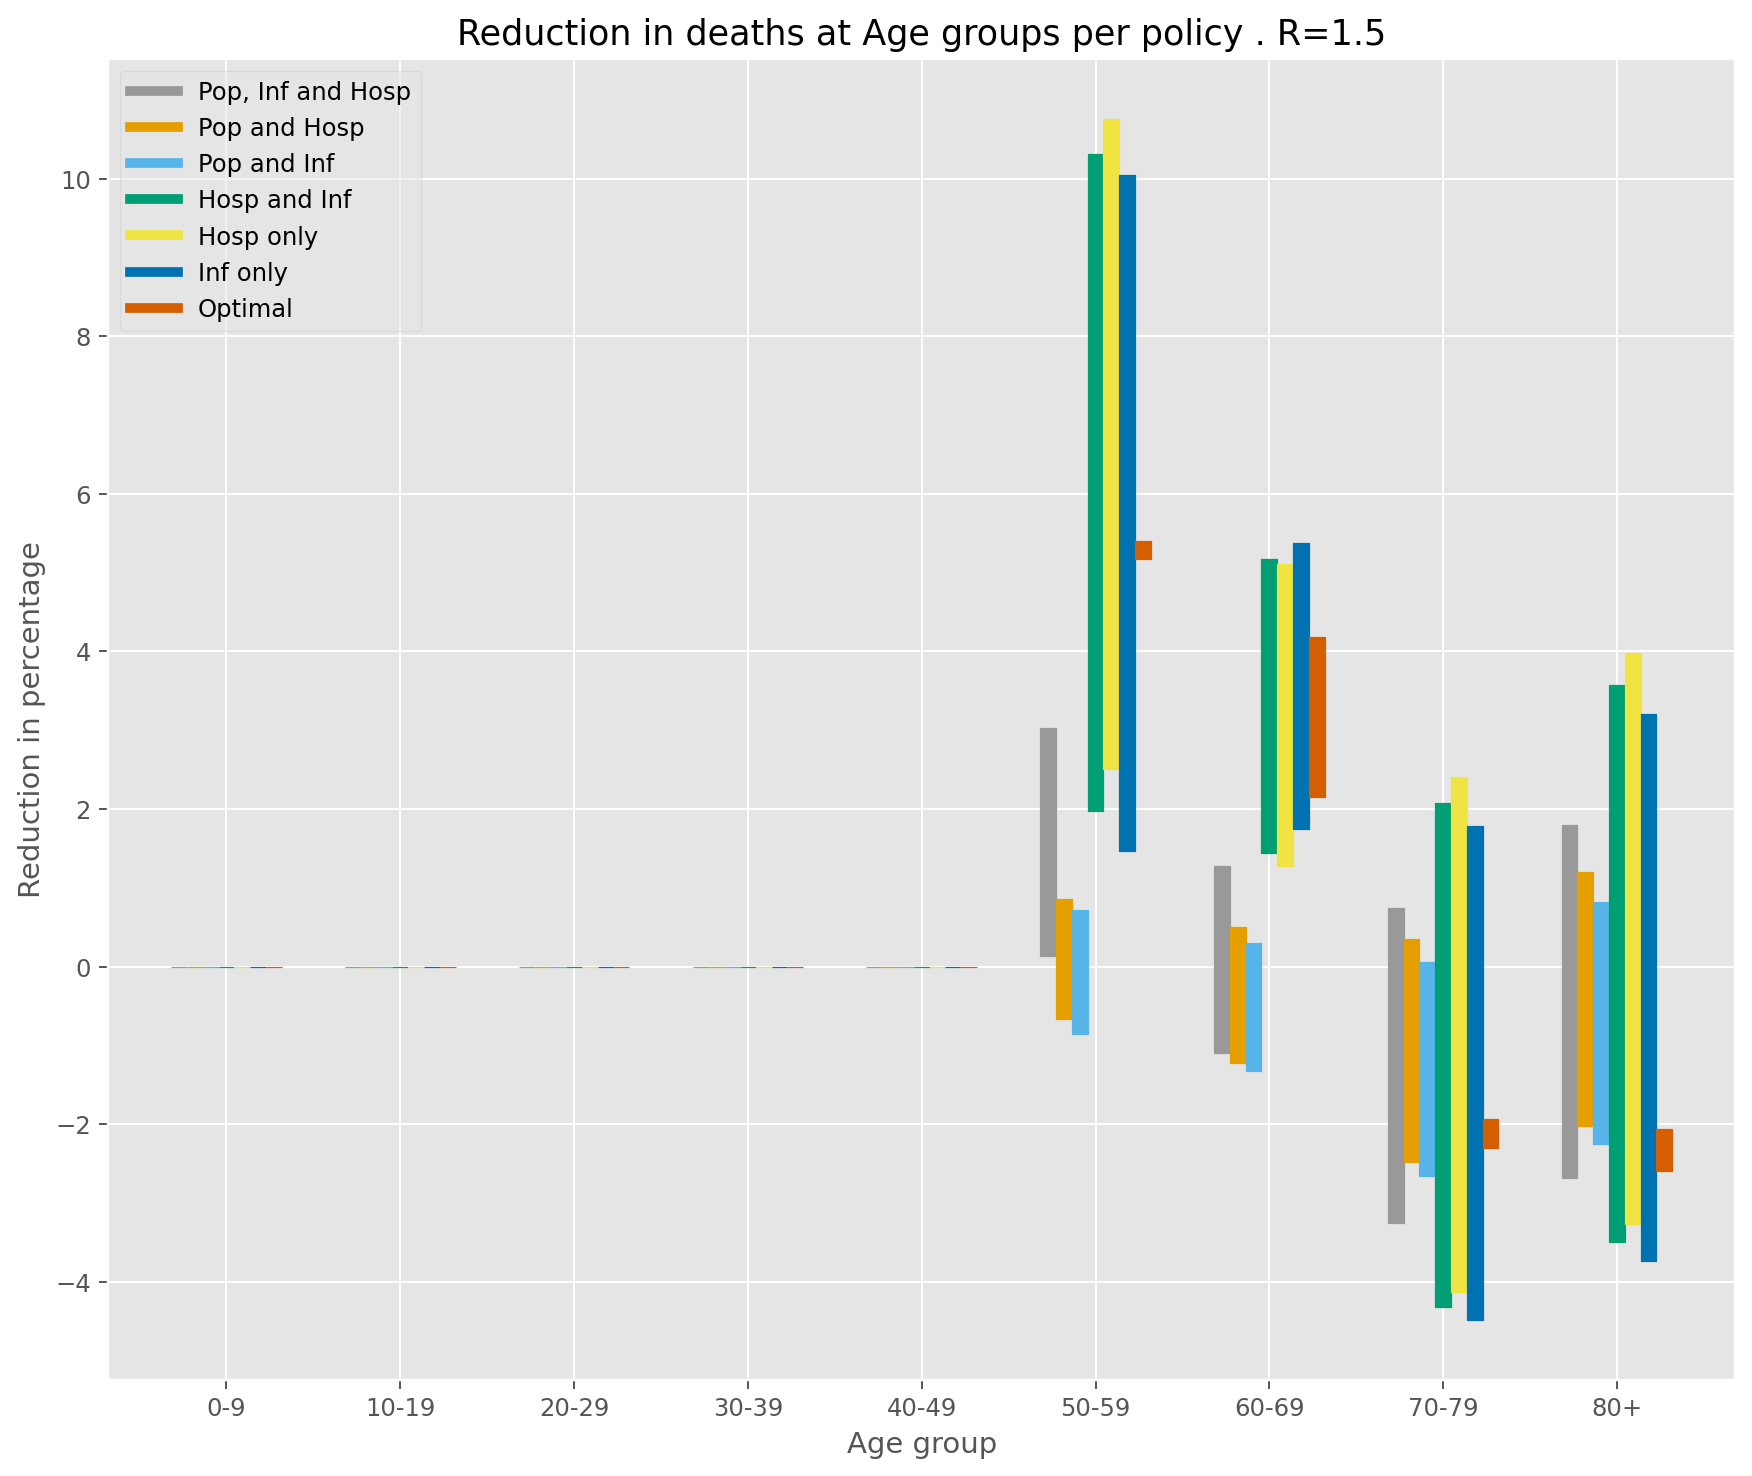

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_bars_ages_ervas(ax, r=1.5, tau=0.5, metric='deaths', exp_results=exp_results, labels=age_labels,
                          plot='Age group', t2=t2, t1=t1, baseline='Pop only', skip_no_vacc=True)

# Hospitalizations

/Users/aponcedeleonch/Documents/Aalto/Courses/MasterThesis/Code/norway-commuter_model-spread/env/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


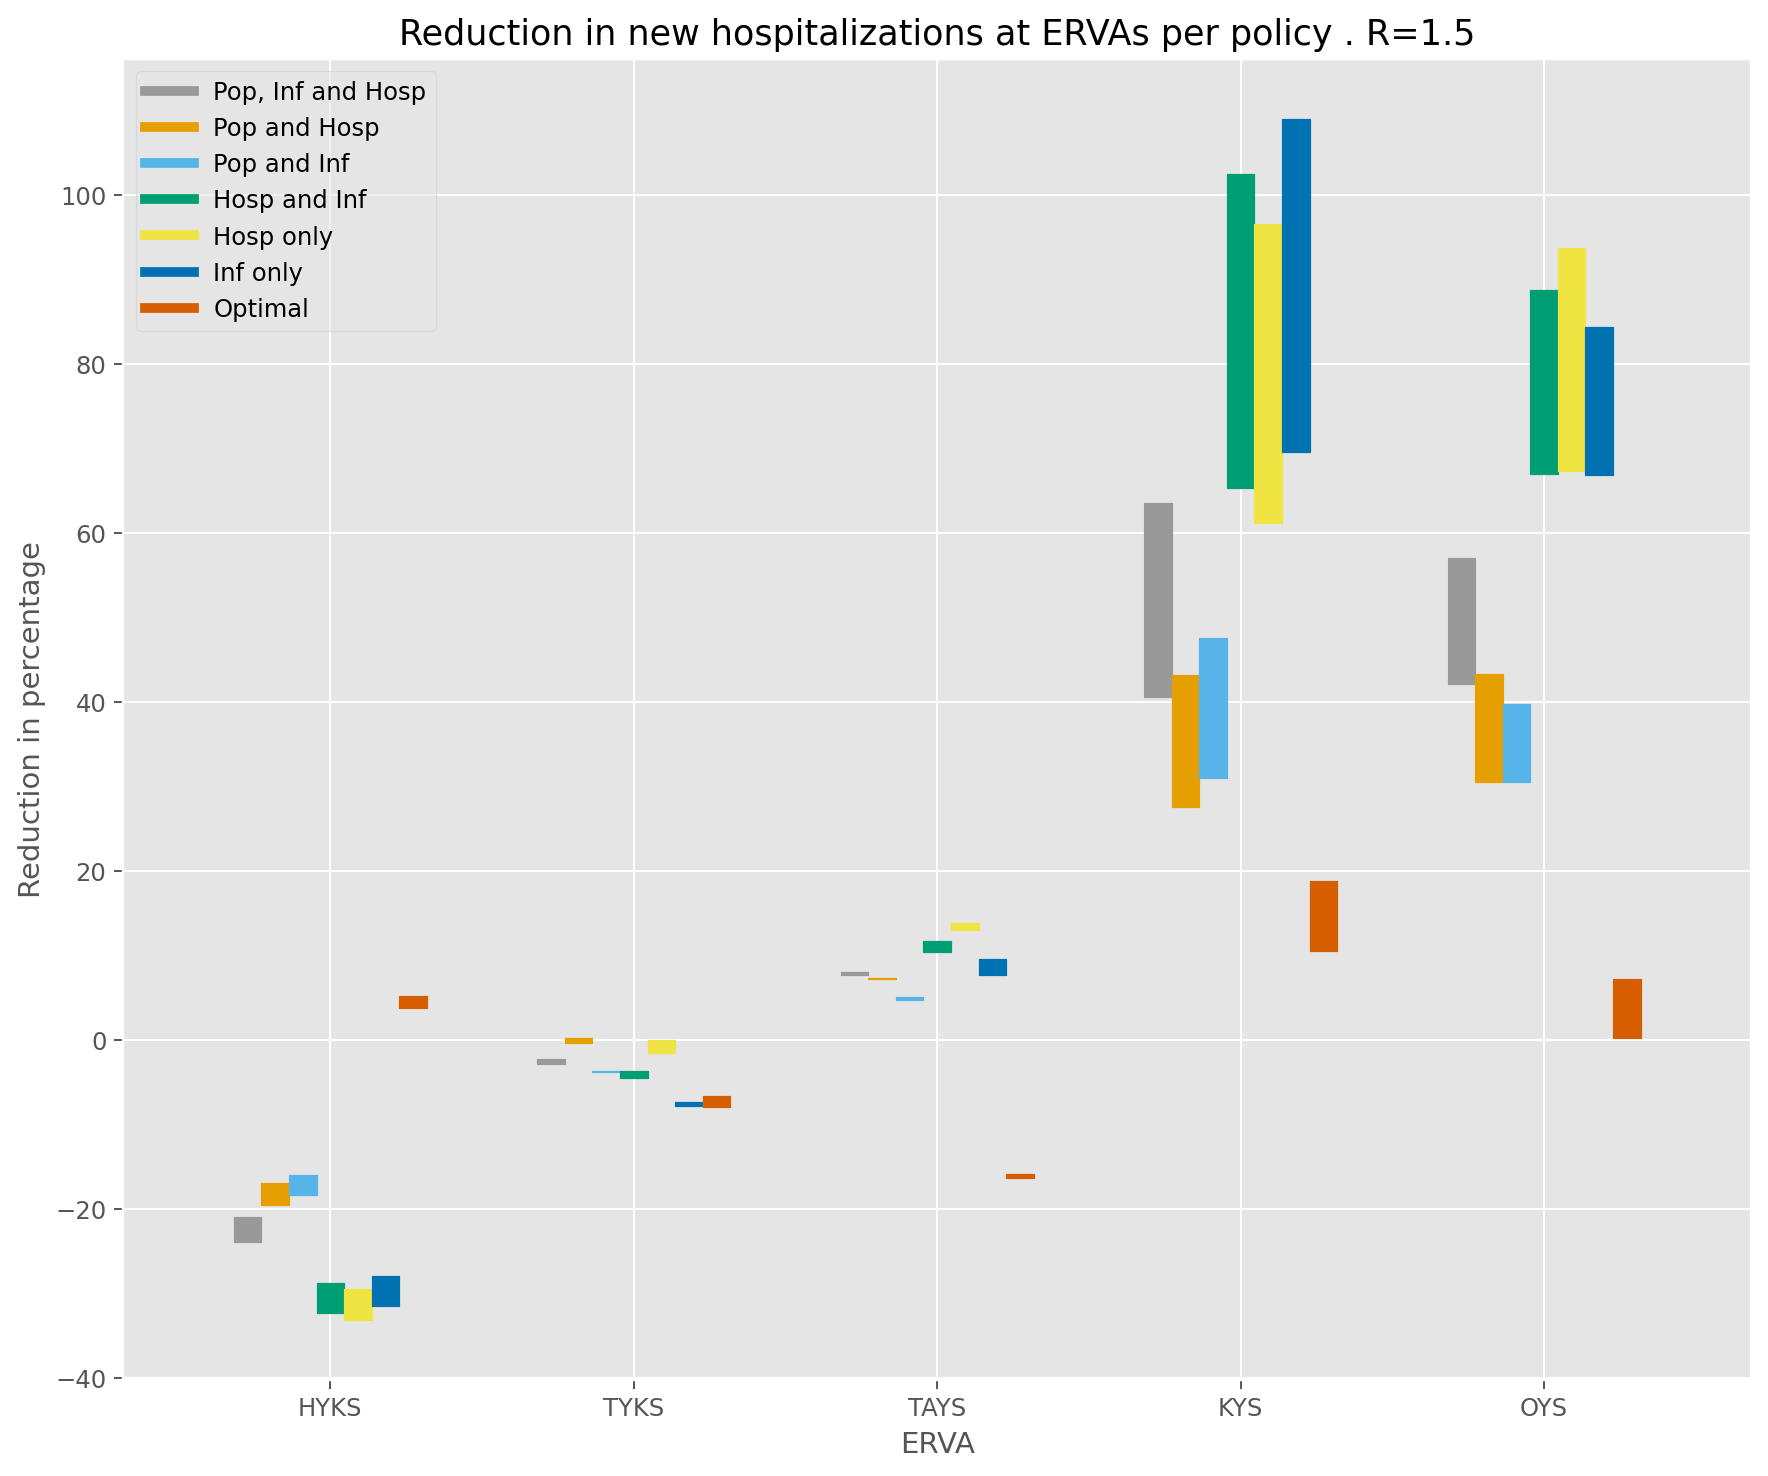

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_bars_ages_ervas(ax, r=1.5, tau=0.5, metric='new hospitalizations', exp_results=exp_results, labels=ervas_labels,
                          plot='ERVA', t2=t2, t1=t1, baseline='Pop only', skip_no_vacc=True)

/Users/aponcedeleonch/Documents/Aalto/Courses/MasterThesis/Code/norway-commuter_model-spread/env/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


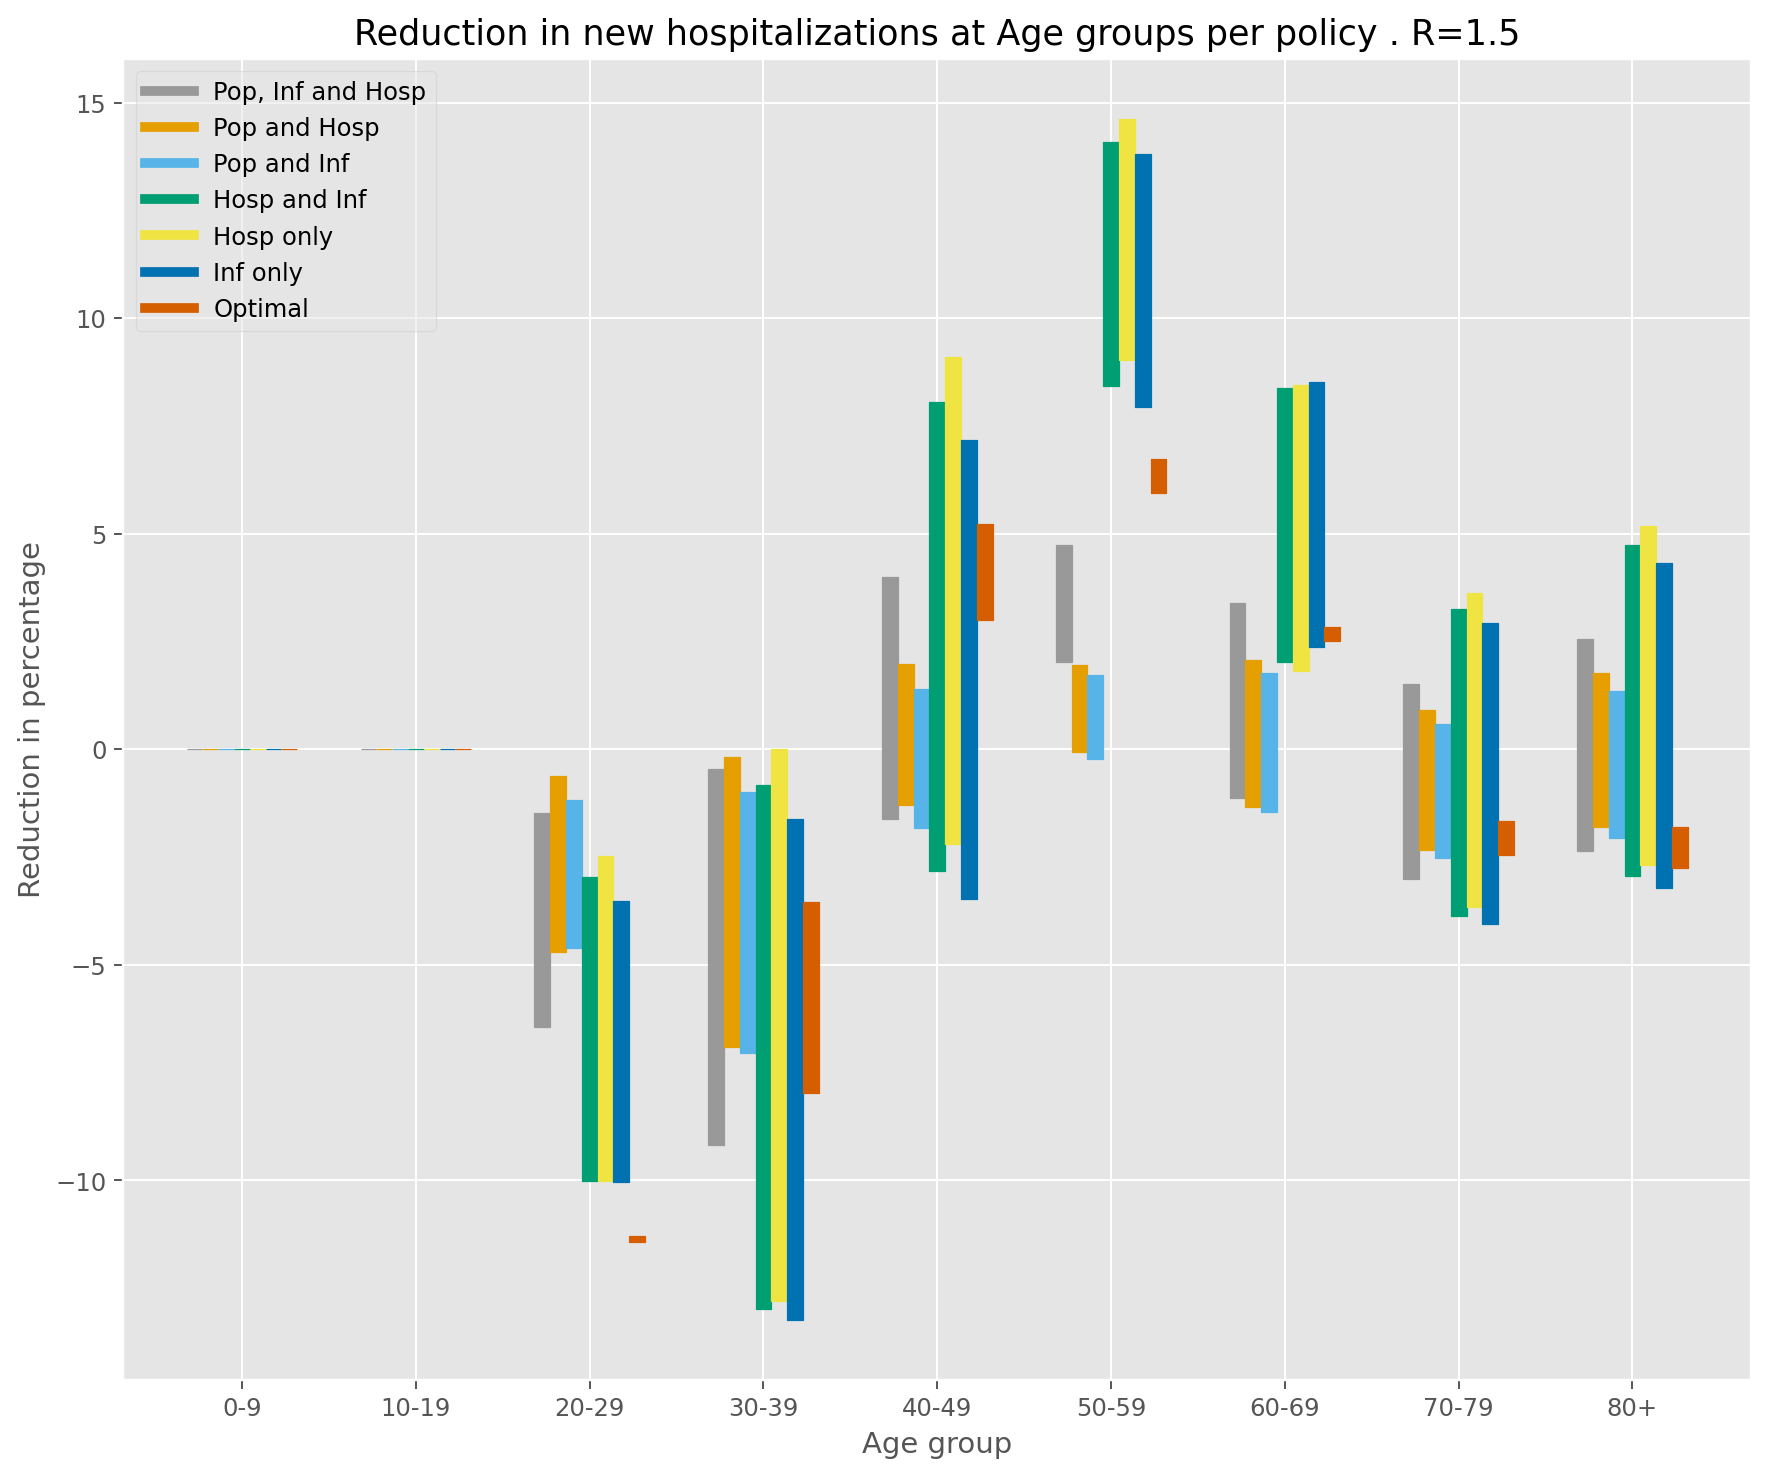

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_bars_ages_ervas(ax, r=1.5, tau=0.5, metric='new hospitalizations', exp_results=exp_results, labels=age_labels,
                          plot='Age group', t2=t2, t1=t1, baseline='Pop only', skip_no_vacc=True)

# Infections

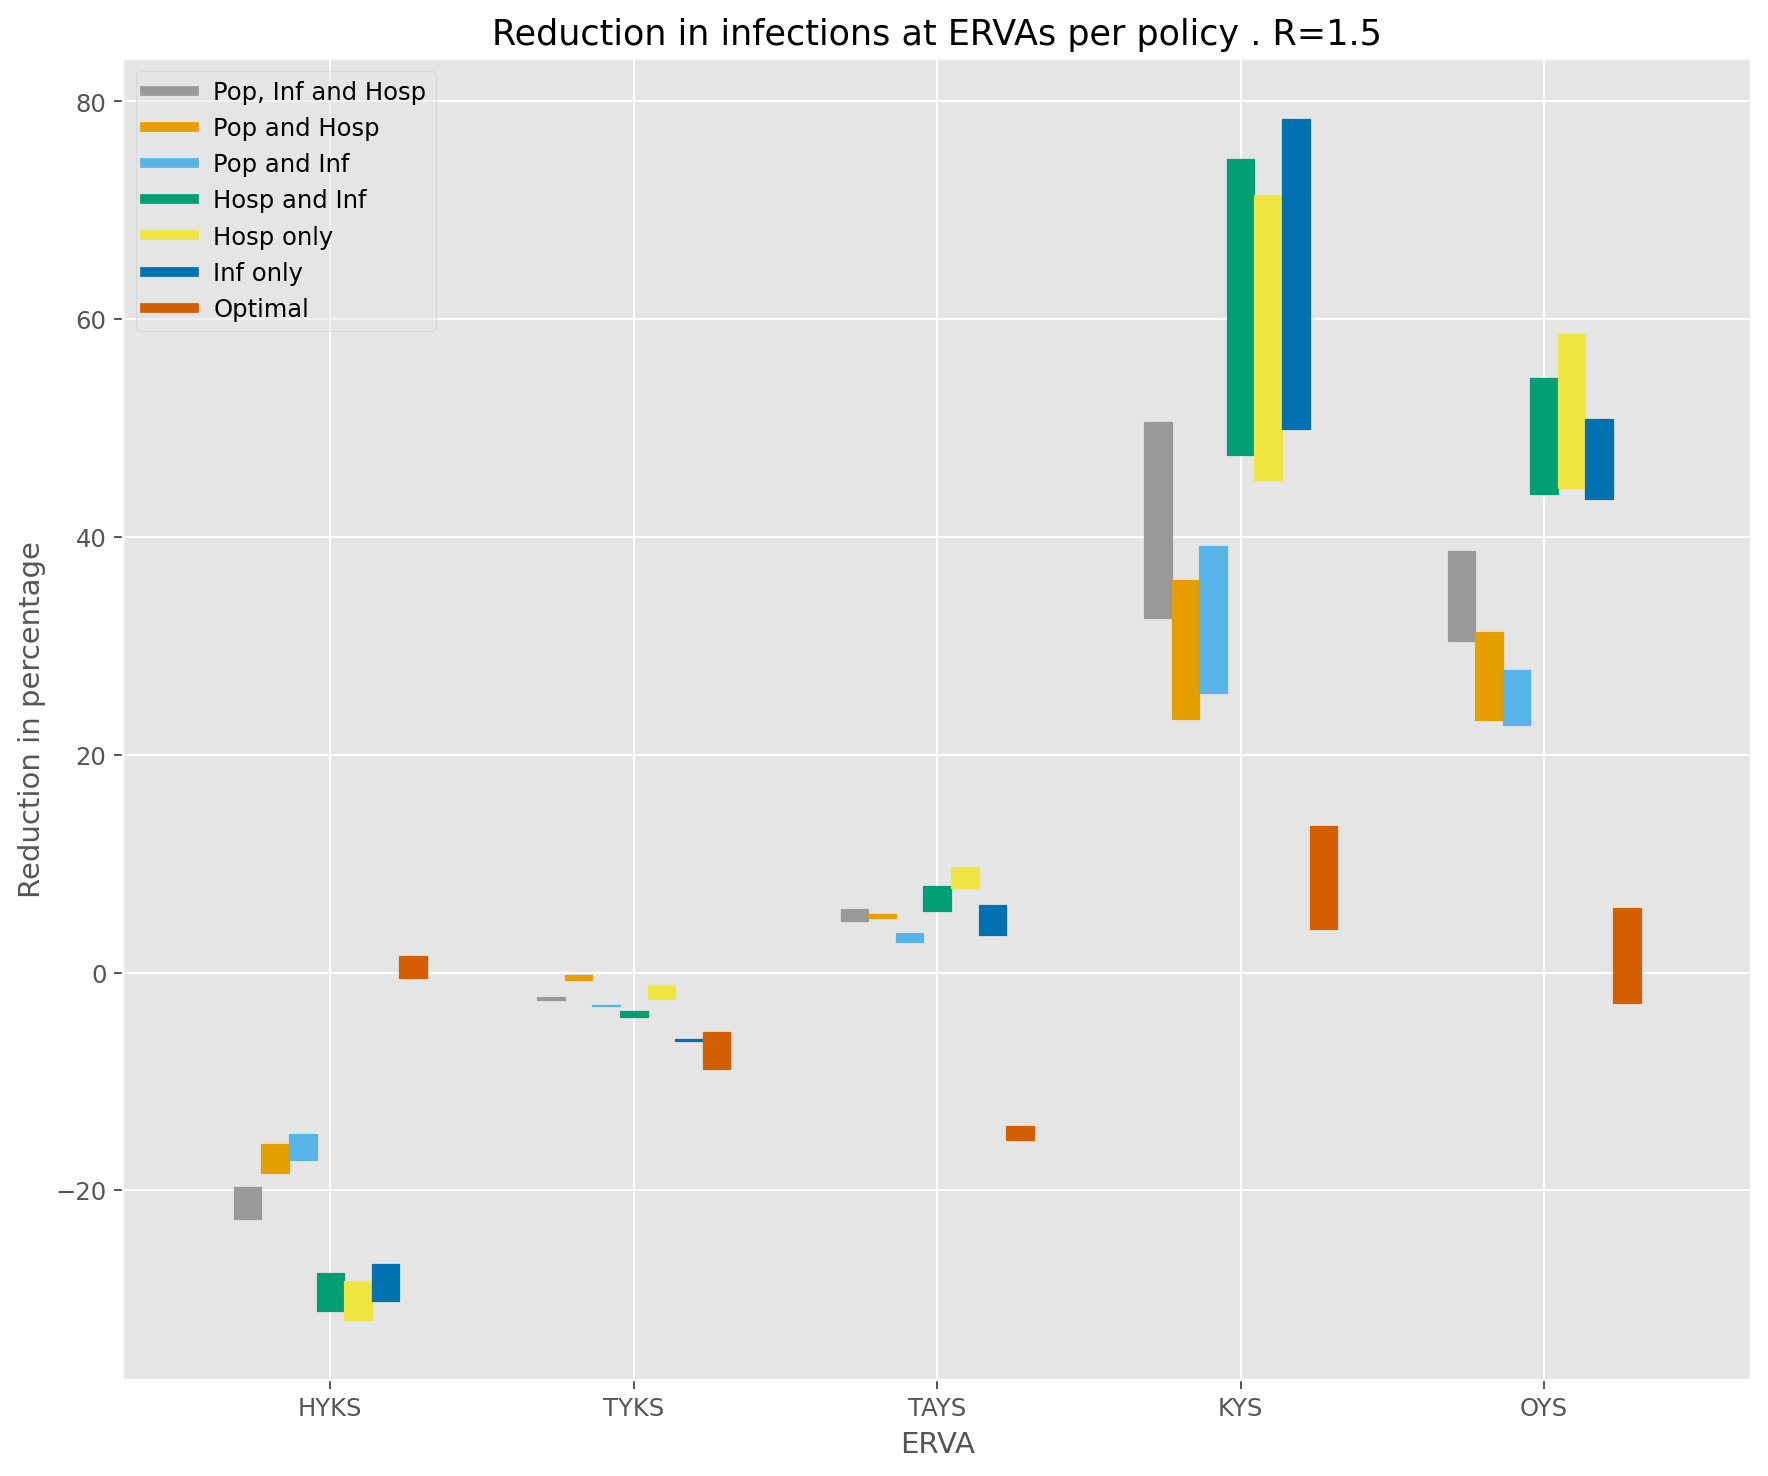

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_bars_ages_ervas(ax, r=1.5, tau=0.5, metric='infections', exp_results=exp_results, labels=ervas_labels,
                          plot='ERVA', t2=t2, t1=t1, baseline='Pop only', skip_no_vacc=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = plot_bars_ages_ervas(ax, r=1.5, tau=0.5, metric='new hospitalizations', exp_results=exp_results, labels=age_labels,
                          plot='Age group', t2=t2, t1=t1, baseline='Pop only', skip_no_vacc=True)